<img src="test.png" align='right' style="width:17%;height:20%">
<div style='font-size:120%;'>
    <a id='nan'></a>
    <h1 style='color:#142b5a; font-weight: bold; font-family: Cascadia code;'>
        <center> Multiple Model analysis with EDA on Spaceship Titanic Dataset </center>
    </h1>
</div>

<img src="https://media.giphy.com/media/xT1XGRSZ9lFLroN1K0/giphy.gif" align='center' style="width:60%;height:82%"></center>


- - -

<div style='font-size:200%;'>
    <a id='nan'></a>
    <h1 style='color: #142b5a; font-weight: bold; font-family: Cascadia code;'> Contents 📖 </h1>
</div>

- [Importing necessary libraries](#import)
- [Importing the dataset](#clean)
- [Discovering the dataset](#discover)
- [Exploratory Data Analysis](#eda)
    - [Finding missing values](#fmv)
    - [Dropping missing numerical values](#dmv)
    - [Replacing missing numerical values](#rmv)
    - [Typecasting](#t)
- [Feature Transformation](#FT)
    - [Replacing using dictionary](#RD)
    - [Label Encoding](#LE)
    - [One-hot Encoding](#HE)
    - [Standardization and Normalization](#SN)
- [Feature Selection](#fs)
- [Feature Extraction](#fe)
   
    
    
- - -

<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing necessary libraries 📚 </center>
    </h1>
 
</div>

<img src="https://www.fireblazeaischool.in/blogs/wp-content/uploads/2020/06/Python-Libraries-1068x712.png" align='center' style="width:60%;height:82%"></center>

In [ ]:
import numpy as np       
import pandas as pd     
import sklearn          
import seaborn as sns   # modif

<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing the dataset ⬇️ </center>
    </h1>
</div>

In [ ]:
data = pd.read_csv('SpaceShip.csv')

<div style='font-size:100%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Discovering the dataset 🔎 </center>
    </h1>
</div>



In this part, we are going to get a general idea about our dataset, such as the number of features and rows, the type of variables we have, and some statistics that will allow us to start understanding the dataset and its secrets. So let's start
    

In [ ]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

-------------------------------------------------------------------------
#### Column Descriptions : 
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
-------------------------------

In [ ]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


The describe() method is used to Generate descriptive statistics such as the mean , maximum and minimum of each feature

In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


- The option (include='all') will enable us to include the categorical columns

In [ ]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
# Thanks to value_counts() we will count how many samples we have in each category of the column 'Cabin'
data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
# unique() will show us the distinct value of the column VIP
data.VIP.unique()

array([False, True, nan], dtype=object)

<div style='font-size:100%;'>
    <a id='eda'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Exploratory Data Analysis 📊 </center>
    </h1>
</div>

**Exploratory Data Analysis(EDA)** refers to the critical process of performing initial investigations on data to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<div style='font-size:100%;'>
    <a id='fmv'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        1) Finding missing values: 
    </h2>
</div>

Missing values can cause problems for machine learning algorithms.It is common to identify missing values in a dataset and dealing with them.This is called data imputing,or missing data imputation.

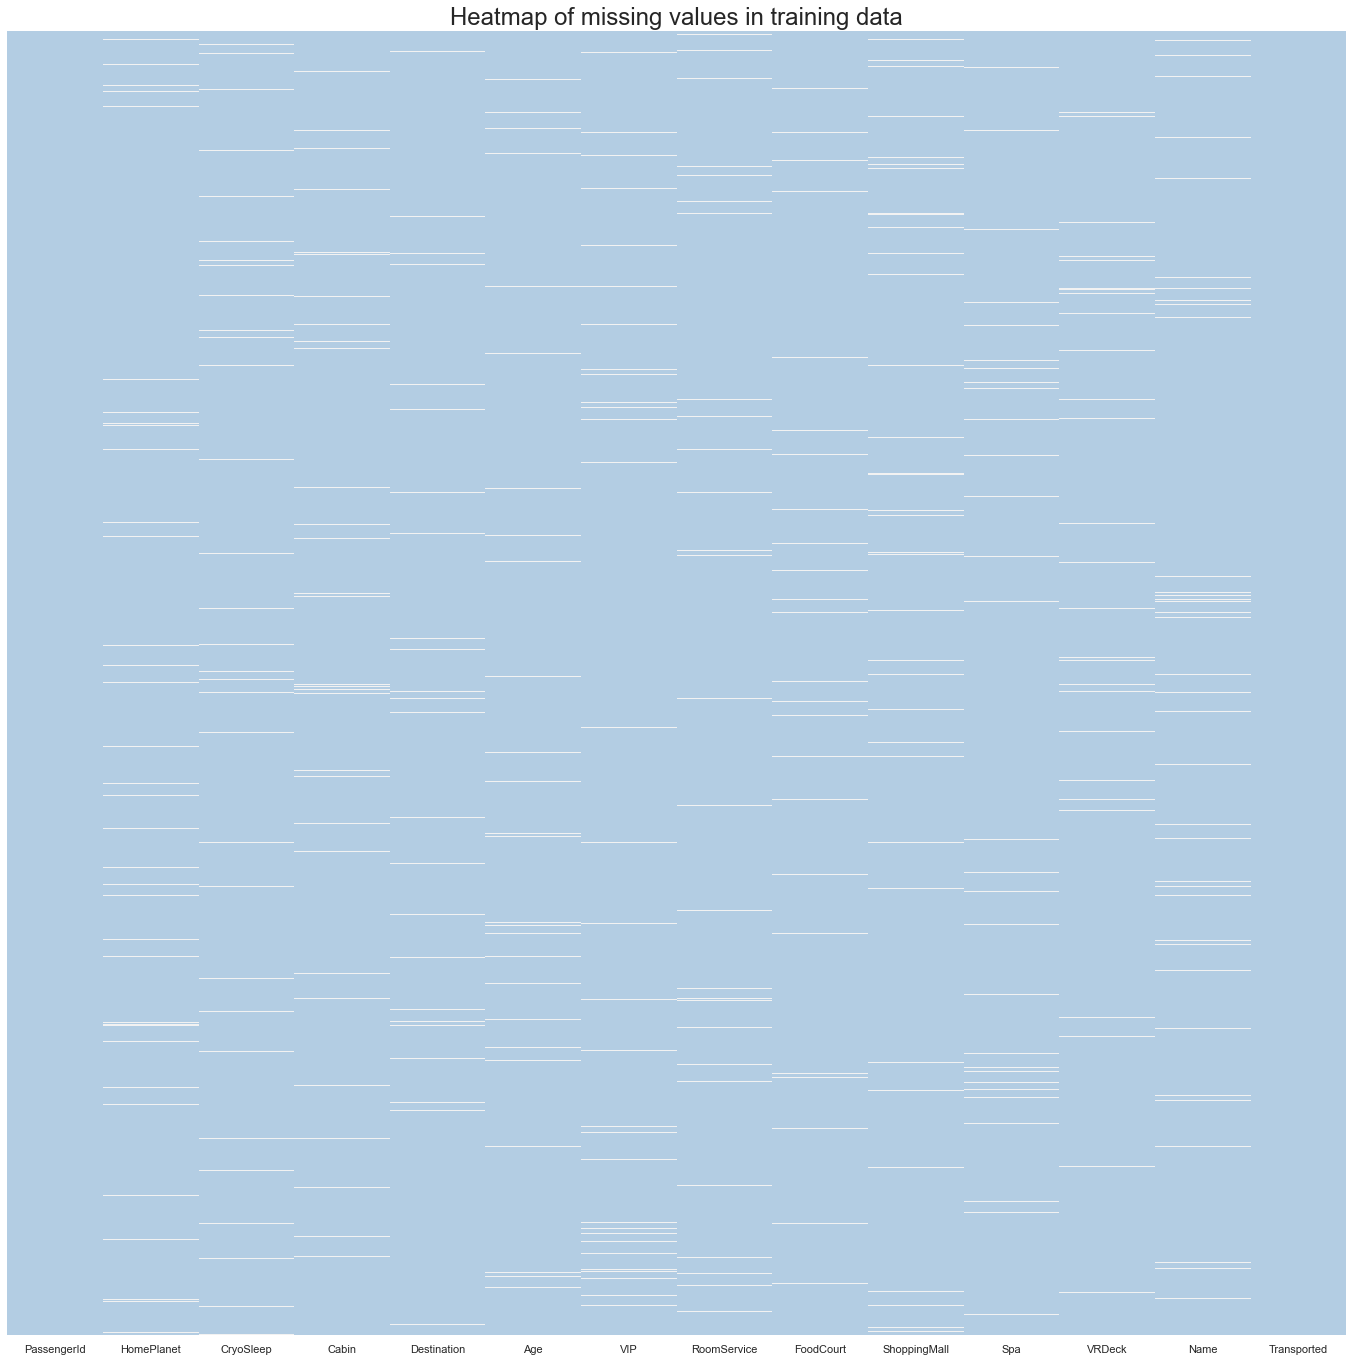

In [21]:
# searching null values
fig=sns.heatmap( yticklabels=False, data=data.isnull(), cbar=False, cmap="Pastel1",center=0.42)

fig.set_title('Heatmap of missing values in training data',fontdict= { 'fontsize': 24})
sns.set(rc={'figure.figsize':(24,24)})

sns.set_theme()

In [24]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [26]:
print("The sum of null values in our dataset =",data.isnull().sum().sum())

The sum of null values in our dataset = 2324


In [27]:
cleanData = data.copy()

In [28]:
cleanData.set_index('PassengerId', inplace=True)

In [37]:
cleanData.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [47]:
cleanData.loc[['0001_01','0002_01'],['HomePlanet','CryoSleep']]

,HomePlanet,CryoSleep
PassengerId,,
0001_01,Europa,False
0002_01,Earth,False


In [44]:
cleanData.iloc[0:2,0:4]

,HomePlanet,CryoSleep,Cabin,Destination
PassengerId,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e
0002_01,Earth,False,F/0/S,TRAPPIST-1e


<div style='font-size:100%;'>
    <a id='dmv'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        2) Dropping missing numerical values:
    </h2>
</div>

In [48]:
data_dropna=cleanData.dropna()

In [49]:
data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   object 
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   object 
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Name          6606 non-null   object 
 12  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 677.4+ KB


In [52]:
data_dropna_any=cleanData.dropna(axis=1,how='any')

In [53]:
data_dropna_any.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  8693 non-null   bool 
dtypes: bool(1)
memory usage: 334.4+ KB


- The option (how='any') will enable dropping any column with at least 1 missing value

In [54]:
data_dropna_all=cleanData.dropna(axis=1,how='all')

In [57]:
data_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 1.1+ MB


In [59]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 1.1+ MB


⚠️ Dropping rows or columns isn’t a really good idea since we are going to lose a lot of data on that row or column.

<div style='font-size:100%;'>
    <a id='rmv'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
      3) Replacing missing numerical values:
    </h2>
</div>

In [60]:
data_fillna = cleanData.copy()

In [61]:
data_fillna['RoomService'].fillna(data_fillna['RoomService'].mean(),inplace = True)

In [62]:
data_fillna.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [63]:
data_fillna['Age'].fillna(data_fillna['Age'].median(),inplace = True)

In [64]:
data_fillna.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [66]:
data_fillna['VRDeck'].mode()

0    0.0
Name: VRDeck, dtype: float64

In [67]:
data_fillna.index

Index(['0001_01', '0002_01', '0003_01', '0003_02', '0004_01', '0005_01',
       '0006_01', '0006_02', '0007_01', '0008_01',
       ...
       '9272_02', '9274_01', '9275_01', '9275_02', '9275_03', '9276_01',
       '9278_01', '9279_01', '9280_01', '9280_02'],
      dtype='object', name='PassengerId', length=8693)

In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_fillna = pd.DataFrame(imputer.fit_transform(data_fillna), columns=data_fillna.columns, index=data_fillna.index)

In [70]:
print("The sum of null values in our dataset =",data_fillna.isnull().sum().sum())

The sum of null values in our dataset = 0


<div style='font-size:100%;'>
    <a id='t'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
      4) Typecasting: 
    </h2>
</div>

The process of changing a variable data type into a specific one in order to be able to use it later in our ML models.

In [74]:
print('Column Transported is of type ',type(data.Transported[0]))

Column Transported is of type  <class 'numpy.int32'>


In [75]:
# converting Transported from bool type to int type
data.Transported = data.Transported.astype('int')

In [76]:
print('Column Transported is of type ',type(data.Transported[0]))

Column Transported is of type  <class 'numpy.int32'>


In [77]:
data['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

<div style='font-size:100%;'>
    <a id='FT'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Feature Transformation ⚙️ </center>
    </h1>
</div>

In this part, we'll employ a variety of encoding techniques to convert our dataset's categorical values to numerical ones. Because most ML models only function with numerical values, it is crucial to understand how to handle these kinds of operations.

<div style='font-size:100%;'>
    <a id='RD'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
      1) Replacing using dictionary 
    </h2>
</div>

In [78]:
data_transformation = data_fillna.copy()

In [79]:
data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [83]:
destination_dictionary={'TRAPPIST-1e':0,'55 Cancri e':1,'PSO J318.5-22':2}
transported_dictionary={False:0,True:1}

In [84]:
data_transformation.replace(destination_dictionary,inplace=True)
data_transformation.replace(transported_dictionary,inplace=True)
data_transformation.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
0002_01,Earth,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
0003_01,Europa,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
0003_02,Europa,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
0004_01,Earth,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


<div style='font-size:100%;'>
    <a id='LE'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
      2) Label encoding 
    </h2>
</div>

**Label encoding** is a very simple approch and it involves converting the labels into a numeric form 

In [85]:
data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [86]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [87]:
data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_transformation['HomePlanet'] = le.fit_transform(data_transformation['HomePlanet'])
data_transformation['VIP'] = le.fit_transform(data_transformation['VIP'])
data_transformation['Cabin'] = le.fit_transform(data_transformation['Cabin'])

In [89]:
data_transformation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   int32  
 3   Destination   8693 non-null   int64  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8693 non-null   object 
 12  Transported   8693 non-null   int64  
dtypes: float64(6), int32(2), int64(4), object(1)
memory usage: 1.1+ MB


In [90]:
data_transformation.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,1,0,149,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
0002_01,0,0,2184,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
0003_01,1,0,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
0003_02,1,0,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
0004_01,0,0,2186,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
      3) One-hot encoding 
    </h2>
</div>

**One hot encoding** is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [91]:
data_transformation['CryoSleep'].value_counts()

0    5656
1    3037
Name: CryoSleep, dtype: int64

In [92]:
data_transformation['Destination'].value_counts()

0    6097
1    1800
2     796
Name: Destination, dtype: int64

In [93]:
data_transformation = pd.get_dummies(data_transformation, columns=['CryoSleep'])
data_transformation = pd.get_dummies(data_transformation, columns=['Destination'])
data_transformation.head()

,HomePlanet,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2
PassengerId,,,,,,,,,,,,,,,,
0001_01,1,149,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0,1,0,0
0002_01,0,2184,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,0,1,0,0
0003_01,1,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,0,1,0,0
0003_02,1,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,0,1,0,0
0004_01,0,2186,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,1,0,0


In [94]:
data_transformation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   int32  
 1   Cabin          8693 non-null   int32  
 2   Age            8693 non-null   float64
 3   VIP            8693 non-null   int64  
 4   RoomService    8693 non-null   float64
 5   FoodCourt      8693 non-null   float64
 6   ShoppingMall   8693 non-null   float64
 7   Spa            8693 non-null   float64
 8   VRDeck         8693 non-null   float64
 9   Name           8693 non-null   object 
 10  Transported    8693 non-null   int64  
 11  CryoSleep_0    8693 non-null   uint8  
 12  CryoSleep_1    8693 non-null   uint8  
 13  Destination_0  8693 non-null   uint8  
 14  Destination_1  8693 non-null   uint8  
 15  Destination_2  8693 non-null   uint8  
dtypes: float64(6), int32(2), int64(2), object(1), uint8(5)
memory usage: 1.0+ MB


**Deleting Features**

In [96]:
data['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [97]:
data_transformation.drop(columns=['Cabin', 'Name'], inplace=True)
data_transformation.head()

,HomePlanet,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_0,CryoSleep_1,Destination_0,Destination_1,Destination_2
PassengerId,,,,,,,,,,,,,,
0001_01,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,1,0,0
0003_01,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0
0003_02,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0
0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,1,0,0


In [98]:
data_transformation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   int32  
 1   Age            8693 non-null   float64
 2   VIP            8693 non-null   int64  
 3   RoomService    8693 non-null   float64
 4   FoodCourt      8693 non-null   float64
 5   ShoppingMall   8693 non-null   float64
 6   Spa            8693 non-null   float64
 7   VRDeck         8693 non-null   float64
 8   Transported    8693 non-null   int64  
 9   CryoSleep_0    8693 non-null   uint8  
 10  CryoSleep_1    8693 non-null   uint8  
 11  Destination_0  8693 non-null   uint8  
 12  Destination_1  8693 non-null   uint8  
 13  Destination_2  8693 non-null   uint8  
dtypes: float64(6), int32(1), int64(2), uint8(5)
memory usage: 945.7+ KB


<div style='font-size:100%;'>
    <a id='SN'></a>
    <h2 style='color: black; font-weight: bold; font-family: Cascadia code;'>
      4) Standardization and Normalization 
    </h2>
</div>

As long as we have in our dataset very large numbers and very small ones our model will focuss on the huge numbers and will ignore the small ones. That's why we should use normalization which rescales the values into a range of [0,1] or Standardization which rescales data to have a mean of 0 and standard deviation of 1.

### a) Standardization

In [100]:
data_StandardScaler = data_transformation.copy()

#### i) StandardScaler

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_StandardScaler = scaler.fit_transform(data_StandardScaler)
data_StandardScaler=pd.DataFrame(data_StandardScaler)

In [102]:
data_StandardScaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.440385,0.711945,-0.153063,-0.340590,-0.281027,-0.283579,-0.270626,-0.263003,-1.007274,0.73277,-0.73277,0.652521,-0.511013,-0.317487
1,-0.817259,-0.334037,-0.153063,-0.175364,-0.275387,-0.241771,0.217158,-0.224205,0.992779,0.73277,-0.73277,0.652521,-0.511013,-0.317487
2,0.440385,2.036857,6.533255,-0.275409,1.959998,-0.283579,5.695623,-0.219796,-1.007274,0.73277,-0.73277,0.652521,-0.511013,-0.317487
3,0.440385,0.293552,-0.153063,-0.340590,0.523010,0.336851,2.687176,-0.092818,-1.007274,0.73277,-0.73277,0.652521,-0.511013,-0.317487
4,-0.817259,-0.891895,-0.153063,0.118709,-0.237159,-0.031059,0.231374,-0.261240,0.992779,0.73277,-0.73277,0.652521,-0.511013,-0.317487


#### ii) RobustScaler

In [103]:
data_RobustScaler = data_transformation.copy()

In [104]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_RobustScaler = scaler.fit_transform(data_RobustScaler)
data_RobustScaler=pd.DataFrame(data_RobustScaler)

In [105]:
data_RobustScaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.705882,0.0,0.000000,0.000000,0.000000,0.000000,0.000,-1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.176471,0.0,1.397436,0.147541,1.136364,10.358491,1.100,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.823529,1.0,0.551282,58.622951,0.000000,126.698113,1.225,-1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.352941,0.0,0.000000,21.032787,16.863636,62.811321,4.825,-1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.647059,0.0,3.884615,1.147541,6.863636,10.660377,0.050,0.0,0.0,0.0,0.0,0.0,0.0


#### iii) MinMaxScaler

In [106]:
data_MinMaxScaler = data_transformation.copy()

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_MinMaxScaler = scaler.fit_transform(data_MinMaxScaler)
data_MinMaxScaler=pd.DataFrame(data_MinMaxScaler)

In [108]:
data_MinMaxScaler.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.5,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,1.0,0.0,1.0,0.0,0.0
2,0.5,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,1.0,0.0,0.0
3,0.5,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,1.0,0.0,1.0,0.0,0.0


### b) Normalization

In [110]:
data_normalized =preprocessing.normalize(data_MinMaxScaler)
data_normalized = pd.DataFrame(data_normalized)

In [112]:
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.316626,0.312618,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.633253,0.0,0.633253,0.0,0.0
1,0.000000,0.172742,0.00000,0.004326,0.000172,0.000605,0.013931,0.001037,0.568608,0.568608,0.0,0.568608,0.0,0.0
2,0.253405,0.372089,0.50681,0.001521,0.060791,0.000000,0.151876,0.001029,0.000000,0.506810,0.0,0.506810,0.0,0.0
3,0.319521,0.266942,0.00000,0.000000,0.027501,0.010092,0.094938,0.005111,0.000000,0.639043,0.0,0.639043,0.0,0.0
4,0.000000,0.116119,0.00000,0.012125,0.001346,0.003685,0.014456,0.000048,0.573337,0.573337,0.0,0.573337,0.0,0.0


<div style='font-size:100%;'>
    <a id='fs'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Feature Selection ✅</center>
    </h1>
</div>

The presence of irrelevant features in your data can reduce model accuracy and cause your model to train based on irrelevant features. **Feature selection** is the process of selecting the features that contribute the most to the prediction variable or output that you are interested in, either automatically or manually.

<div style='font-size:100%;'>
    <a id='fe'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Feature Extraction ↘️</center>
    </h1>
</div>

**Feature extraction** is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing

<center> <img src="PCA.jpeg"> </center>

<div style='font-size:200%;'>
    <a id='import'></a>
    <h3 style='color: #49afc7; font-weight: bold; font-family: Cascadia code;'>
        <center> Thank you for your attention! </center>
    </h3>
    <h1 style='color: #142b5a; font-weight: bold; font-family: Cascadia code;'>
        <center> DeepFlow Esprit </center>
    </h1>
    <center><img style='height: 60%; width: 60%' src="test.png"> </center>
</div>